In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# 设置 Matplotlib 和 Seaborn 的样式
plt.style.use('ggplot') # 使用 ggplot 风格，可选
sns.set_theme(style="whitegrid") # 设置 seaborn 主题

In [3]:
# 加载数据
# 尝试从本地加载，如果文件不存在，则从seaborn加载示例数据集
df = pd.read_excel('/home/hmd24/project/TOC_Warning_System/data/processed/TOC_dataset.xlsx')
print("数据加载成功！")

数据加载成功！


In [4]:
# 1. 确保 'timestamp' 列是 datetime 类型，并设置为索引
# 假设您的时间戳列名为 'timestamp'
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
print("数据加载并设置时间戳为索引成功！")

# 2. 初步检查
print("\n--- 2.1 数据集的头部（前5行）---")
print(df.head())

print("\n--- 2.2 数据集的尾部（后5行）---")
print(df.tail())

print("\n--- 2.3 数据集的基本信息（非空值、数据类型）---")
df.info()

print("\n--- 2.4 数据集的统计摘要（数值型特征）---")
print(df.describe())

print("\n--- 2.5 数据集的形状（行数, 列数）---")
print(f"数据集的形状：{df.shape}")

print("\n--- 2.6 每列的缺失值数量 ---")
print(df.isnull().sum())

print("\n--- 2.7 每列缺失值的百分比 ---")
print((df.isnull().sum() / len(df)) * 100)

print("\n--- 2.8 时间戳连续性检查 ---")
time_diff = df.index.to_series().diff()
# 检查时间步长是否一致
print(f"最小时间步长: {time_diff.min()}")
print(f"最大时间步长: {time_diff.max()}")
print(f"平均时间步长: {time_diff.mean()}")

# 如果时间步长不一致，可以找出不连续的点
if not (time_diff.max() == time_diff.min()):
    print("注意：时间戳存在不连续点或非均匀采样。")
    # 进一步找出具体的跳变点：
    # print(time_diff[time_diff != time_diff.mode()[0]]) # 找出和众数时间步长不一样的点

数据加载并设置时间戳为索引成功！

--- 2.1 数据集的头部（前5行）---
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2024-01-27 18:00:00  2.78  31.25  16.93  3.30  1.86      0.55
2024-01-27 19:00:00  2.78  31.25  17.63  3.29  1.86      0.55
2024-01-27 20:00:00  2.78  31.25  18.33  3.28  1.87      0.55
2024-01-27 21:00:00  2.78  31.25  19.02  3.27  1.87      0.55
2024-01-27 22:00:00  2.78  31.25  19.72  3.26  1.87      0.55

--- 2.2 数据集的尾部（后5行）---
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2025-03-21 02:00:00  3.16  55.17  21.22  3.85  2.00      0.60
2025-03-21 03:00:00  3.18  55.75  19.82  3.85  2.00      0.60
2025-03-21 04:00:00  3.20  56.33  18.43  3.85  1.99      0.59
2025-03-21 05:00:00  3.23  56.92  17.03  3.85  1.98      0.59
2025-03-21 06:00:00  3.25  57.50  15.63  3.85  1.97      0.59

--- 2.3 数据集的基本信息（非空值、数据类型）---
<class 'pandas.core.frame.DataFrame'


--- 3.1 时序数据可视化 (线图) ---


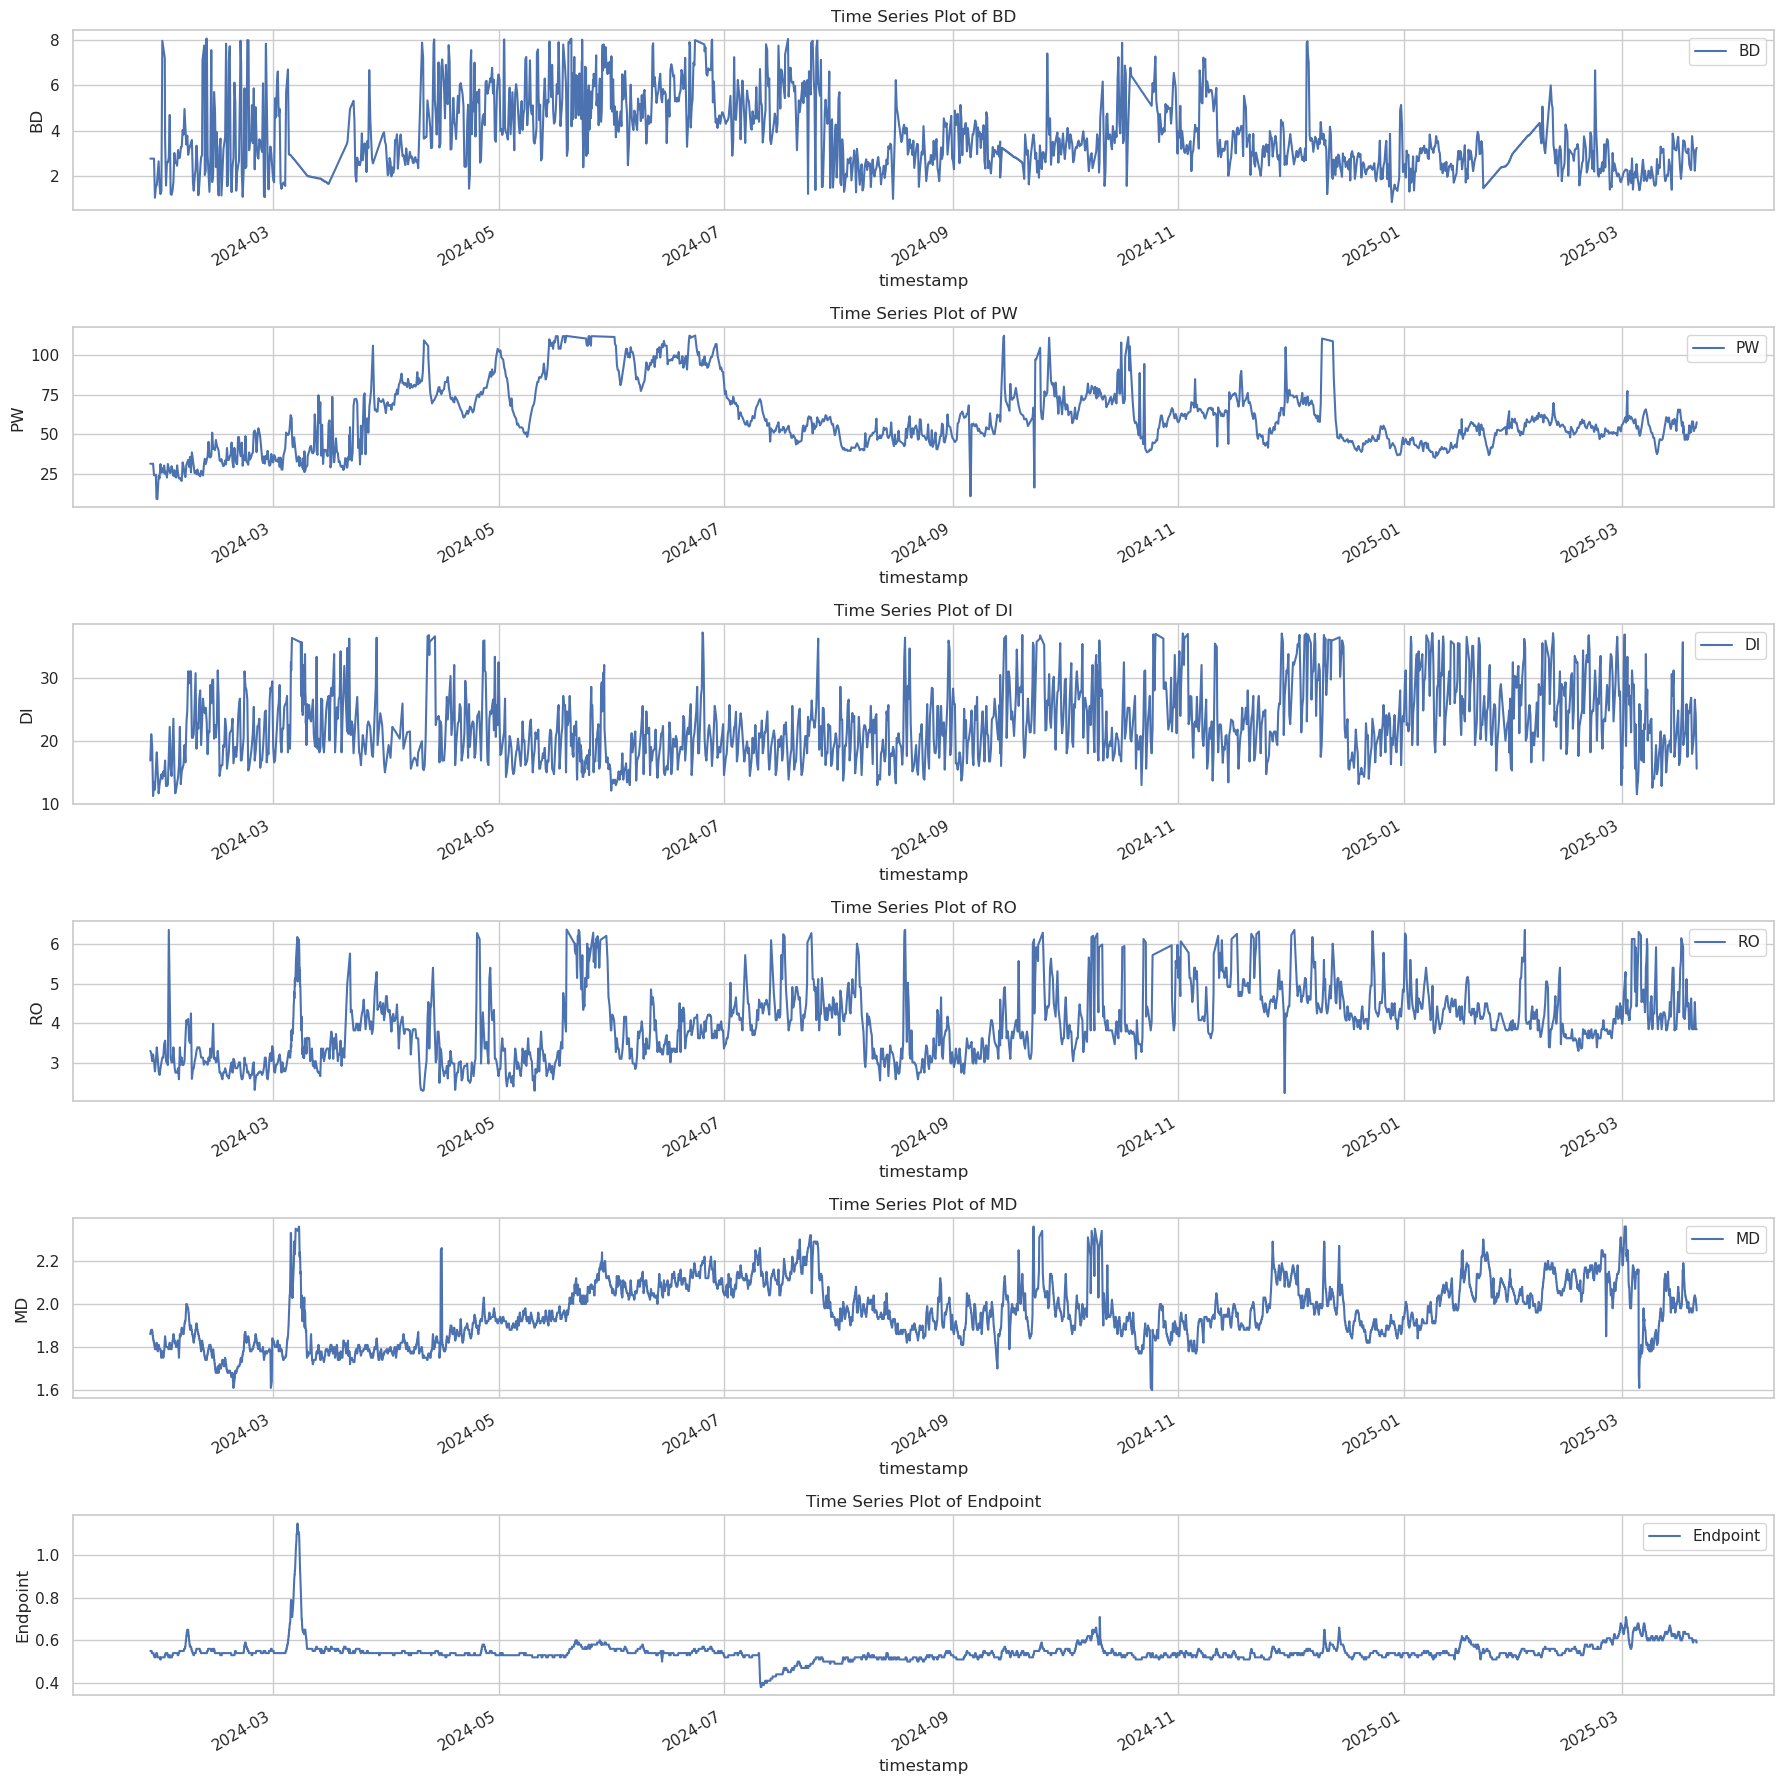


--- 3.2 单变量分布分析 (直方图和箱线图) ---


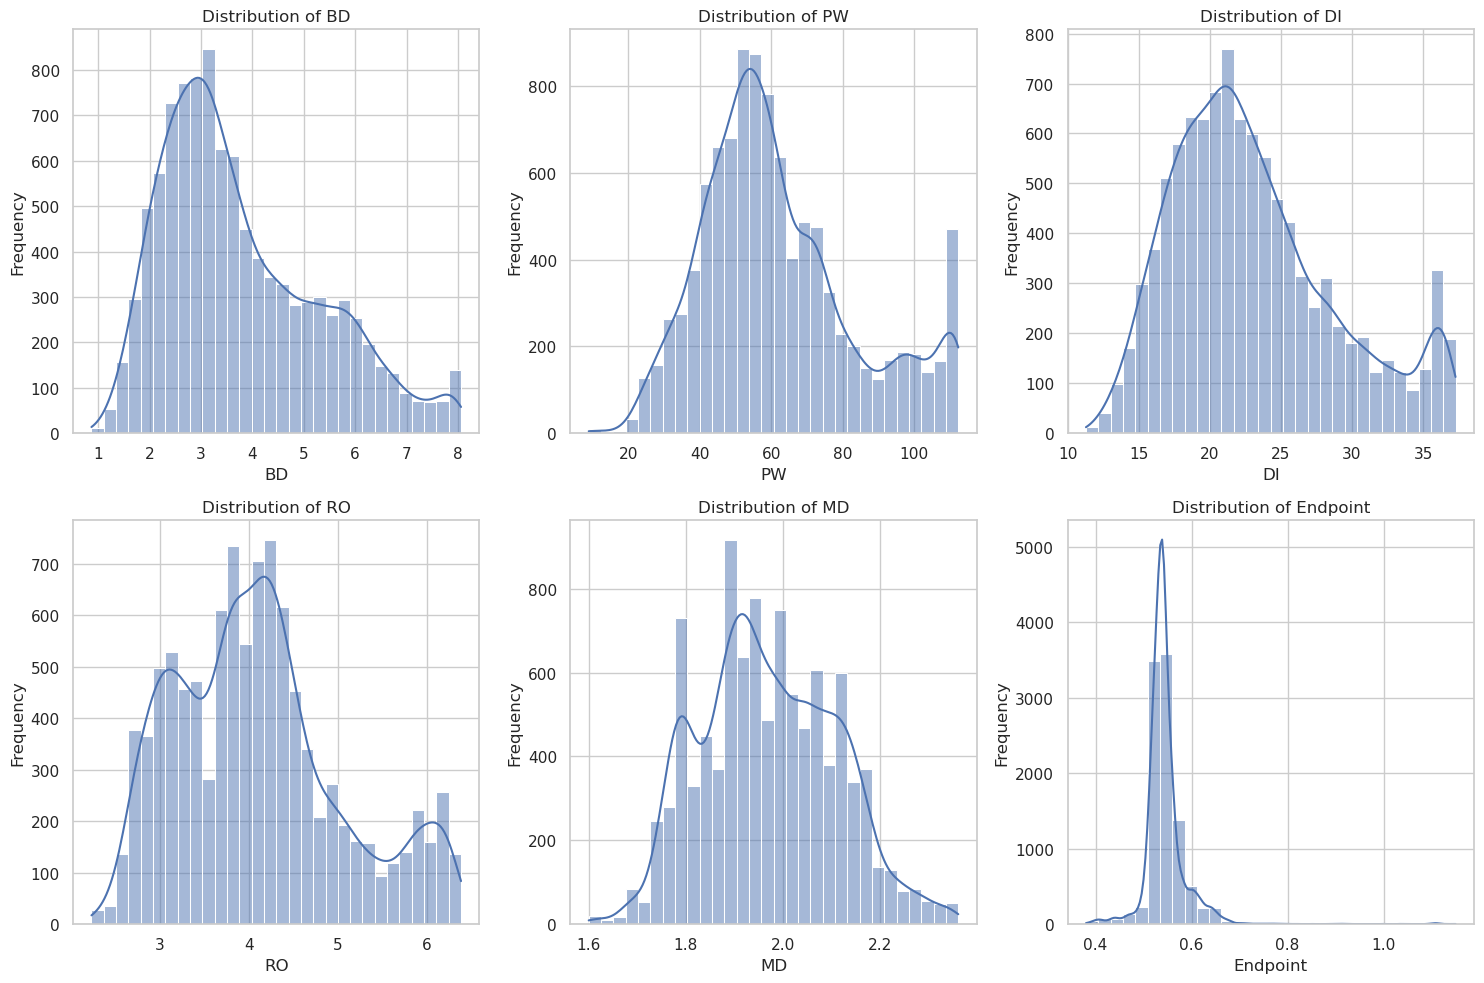

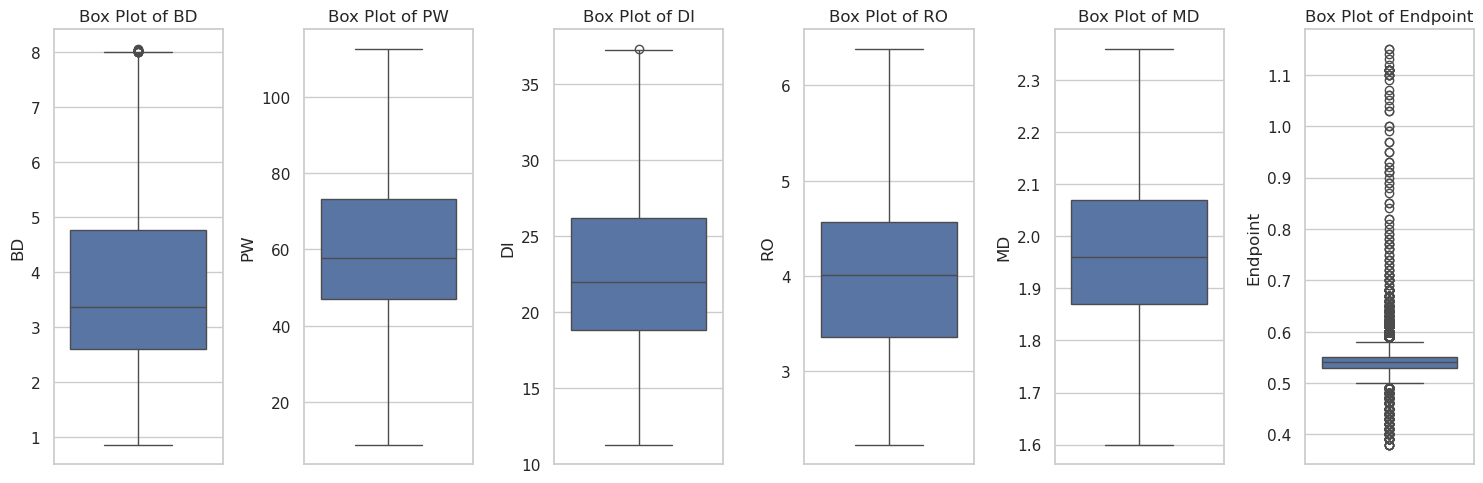

In [5]:
print("\n--- 3.1 时序数据可视化 (线图) ---")

# 确保这里的数值列与您的实际数据列名匹配
numerical_cols_for_plot = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

plt.figure(figsize=(18, len(numerical_cols_for_plot) * 3)) # 根据列数调整图高
for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(len(numerical_cols_for_plot), 1, i + 1)
    df[col].plot(title=f'Time Series Plot of {col}', legend=True)
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- 3.2 单变量分布分析 (直方图和箱线图) ---")
# 这里的数值列通常是连续的，如果 Endpint 是离散的，可以单独分析
numerical_cols_for_dist = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(2, 3, i + 1) # 2行3列布局
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(1, 6, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()